In [1]:
import pandas as pd

try:
    df = pd.read_excel('Downloads/Train.xlsx')
    print(df.head())
except Exception as e:
    
    print("Error:", e)


       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [3]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [4]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
df.dropna(inplace=True)


In [6]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y")

df['Journey_day'] = df['Date_of_Journey'].dt.day
df['Journey_month'] = df['Date_of_Journey'].dt.month


In [7]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Dep_hour'] = df['Dep_Time'].dt.hour
df['Dep_min'] = df['Dep_Time'].dt.minute


C:\Users\SYAMNARAYANAN\AppData\Local\Temp\ipykernel_17752\1926632240.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])


In [8]:
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])
df['Arr_hour'] = df['Arrival_Time'].dt.hour
df['Arr_min'] = df['Arrival_Time'].dt.minute


C:\Users\SYAMNARAYANAN\AppData\Local\Temp\ipykernel_17752\2231083693.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])


In [9]:
df_1 = df.select_dtypes(include='object')

df_1.head()


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info


In [10]:
def convert_duration(x):
    hours = 0
    minutes = 0

    if "h" in x:
        hours = int(x.split("h")[0])

    if "m" in x:
        minutes = int(x.split("m")[0].split()[-1])

    return hours * 60 + minutes

df['Duration_in_min'] = df['Duration'].apply(convert_duration)


In [11]:
# df = df.drop(index =6474)

In [12]:
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_in_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-12-14 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-12-14 05:50:00,2025-12-14 13:15:00,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-12-14 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,9,25,4,25,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2025-12-14 18:05:00,2025-12-14 23:30:00,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,325
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2025-12-14 16:50:00,2025-12-14 21:35:00,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,285


In [13]:
df['Journey_day_of_week'] = df['Date_of_Journey'].dt.dayofweek


No.of weekend flights

In [14]:
df[df['Journey_day_of_week'].isin([5,6])].shape[0]

3144

In [15]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_in_min,Journey_day_of_week
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-12-14 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,170,6
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-12-14 05:50:00,2025-12-14 13:15:00,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,445,2
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-12-14 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,9,25,4,25,1140,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2025-12-14 18:05:00,2025-12-14 23:30:00,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,325,6
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2025-12-14 16:50:00,2025-12-14 21:35:00,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,285,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,2025-12-14 19:55:00,2025-12-14 22:25:00,2h 30m,non-stop,No info,4107,9,4,19,55,22,25,150,1
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2025-12-14 20:45:00,2025-12-14 23:20:00,2h 35m,non-stop,No info,4145,27,4,20,45,23,20,155,5
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2025-12-14 08:20:00,2025-12-14 11:20:00,3h,non-stop,No info,7229,27,4,8,20,11,20,180,5
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,2025-12-14 11:30:00,2025-12-14 14:10:00,2h 40m,non-stop,No info,12648,1,3,11,30,14,10,160,4


In [16]:
df['Airline'].value_counts()


Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [17]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [18]:
df['Source'].value_counts()


Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [19]:
df['Total_Stops'] = df['Total_Stops'].map({
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
})


In [20]:
col_to_encode  = ['Airline', 'Source', 'Destination', 'Additional_Info']

for col in col_to_encode :
    value = df[col].unique()
    print(f'{col}:{value}')
    print('***'*20)

Airline:['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
************************************************************
Source:['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
************************************************************
Destination:['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
************************************************************
Additional_Info:['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']
************************************************************


In [22]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arr_hour', 'Arr_min', 'Duration_in_min',
       'Journey_day_of_week'],
      dtype='object')

In [23]:
df.head(1)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_in_min,Journey_day_of_week
0,3,2019-03-24,0,5,BLR → DEL,2025-12-14 22:20:00,2025-03-22 01:10:00,2h 50m,0,8,3897,24,3,22,20,1,10,170,6


In [24]:
df.drop(columns=['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration',],axis=1,inplace=True)

Most popular airline

In [25]:
df[df['Total_Stops'] != 'non-stop']


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_in_min,Journey_day_of_week
0,3,0,5,0,8,3897,24,3,22,20,1,10,170,6
1,1,3,0,2,8,7662,1,5,5,50,13,15,445,2
2,4,2,1,2,8,13882,9,6,9,25,4,25,1140,6
3,3,3,0,1,8,6218,12,5,18,5,23,30,325,6
4,3,0,5,1,8,13302,1,3,16,50,21,35,285,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,8,4107,9,4,19,55,22,25,150,1
10679,1,3,0,0,8,4145,27,4,20,45,23,20,155,5
10680,4,0,2,0,8,7229,27,4,8,20,11,20,180,5
10681,10,0,5,0,8,12648,1,3,11,30,14,10,160,4


Flights in March

In [26]:
df[df['Journey_month'] == 3]


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_in_min,Journey_day_of_week
0,3,0,5,0,8,3897,24,3,22,20,1,10,170,6
4,3,0,5,1,8,13302,1,3,16,50,21,35,285,4
6,4,0,5,1,5,11087,12,3,18,55,10,25,930,1
7,4,0,5,1,8,22270,1,3,8,0,5,5,1265,4
8,4,0,5,1,5,11087,12,3,8,55,10,25,1530,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10660,10,0,5,0,8,4878,21,3,21,10,0,5,175,3
10662,1,3,0,2,8,12352,24,3,9,25,5,35,1210,6
10667,4,0,5,1,5,11087,12,3,22,55,20,20,1285,1
10674,4,0,5,1,5,11087,12,3,20,35,21,20,1485,1



Flights longer than 10 hours

In [27]:
df[df['Duration_in_min'] > 600]


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_in_min,Journey_day_of_week
2,4,2,1,2,8,13882,9,6,9,25,4,25,1140,6
6,4,0,5,1,5,11087,12,3,18,55,10,25,930,1
7,4,0,5,1,8,22270,1,3,8,0,5,5,1265,4
8,4,0,5,1,5,11087,12,3,8,55,10,25,1530,1
10,1,2,1,1,8,8907,1,6,9,45,23,0,795,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10669,1,2,1,1,8,9929,15,6,8,0,19,15,675,5
10670,1,3,0,2,8,11411,12,5,5,50,23,15,1045,6
10672,4,2,1,2,5,11150,27,6,23,5,19,0,1195,3
10673,4,2,1,2,8,16704,27,5,13,25,4,25,900,0


Flights departing after 6 PM

In [28]:
df[df['Dep_hour'] >= 18]


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_in_min,Journey_day_of_week
0,3,0,5,0,8,3897,24,3,22,20,1,10,170,6
3,3,3,0,1,8,6218,12,5,18,5,23,30,325,6
6,4,0,5,1,5,11087,12,3,18,55,10,25,930,1
11,3,3,0,0,8,4174,18,4,20,20,22,55,155,3
13,4,3,0,1,5,9663,9,5,21,10,9,20,730,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10671,1,4,3,0,8,3100,6,6,21,5,22,25,80,3
10672,4,2,1,2,5,11150,27,6,23,5,19,0,1195,3
10674,4,0,5,1,5,11087,12,3,20,35,21,20,1485,1
10678,0,3,0,0,8,4107,9,4,19,55,22,25,150,1


Flights with duration more than 5 hours

In [29]:
df[df['Duration_in_min'] > 300]


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_in_min,Journey_day_of_week
1,1,3,0,2,8,7662,1,5,5,50,13,15,445,2
2,4,2,1,2,8,13882,9,6,9,25,4,25,1140,6
3,3,3,0,1,8,6218,12,5,18,5,23,30,325,6
6,4,0,5,1,5,11087,12,3,18,55,10,25,930,1
7,4,0,5,1,8,22270,1,3,8,0,5,5,1265,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10672,4,2,1,2,5,11150,27,6,23,5,19,0,1195,3
10673,4,2,1,2,8,16704,27,5,13,25,4,25,900,0
10674,4,0,5,1,5,11087,12,3,20,35,21,20,1485,1
10676,6,2,1,1,8,9794,1,5,10,20,19,0,520,2


In [21]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
cat_cols = ['Airline', 'Source', 'Destination', 'Additional_Info']

for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])


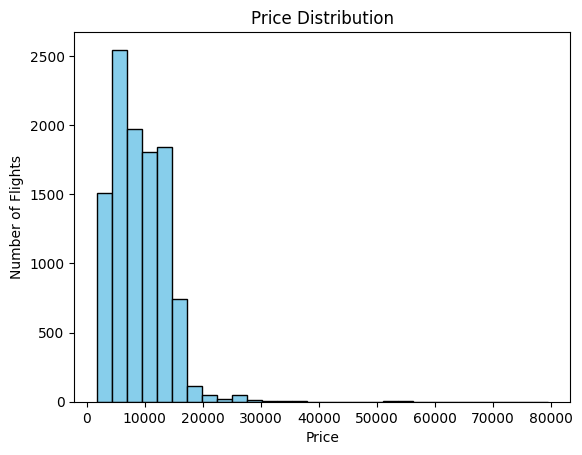

In [30]:
import matplotlib.pyplot as plt

plt.hist(df['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Number of Flights')
plt.show()


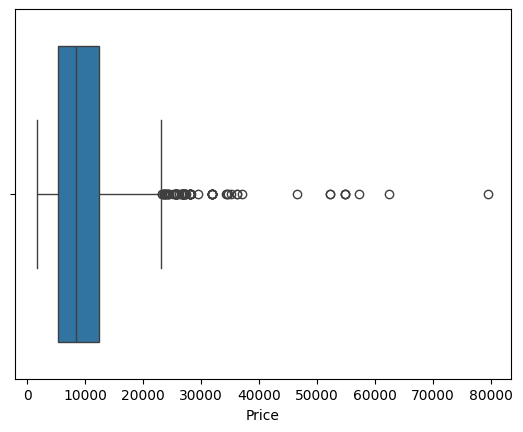

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Price', data=df)
plt.show()


In [32]:
df = df[df['Price'] < df['Price'].quantile(0.95)]


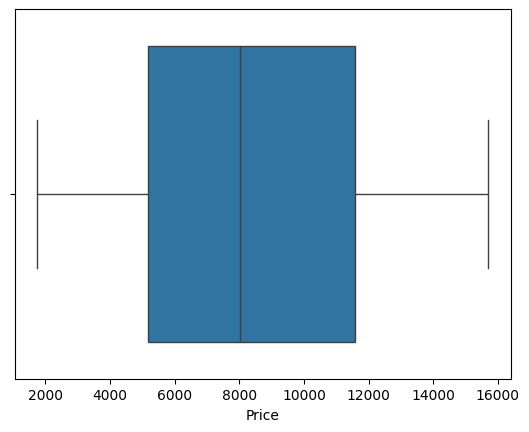

In [33]:
sns.boxplot(x='Price', data=df)
plt.show()


In [34]:
from sklearn.ensemble import RandomForestRegressor

X = df.drop(['Price'],axis = 1)
y = df['Price']


model = RandomForestRegressor()
model.fit(X,y)


important = model.feature_importances_
feature = X.columns

dataframe = pd.DataFrame({
    "features_name":feature,
    "importances":important
}).sort_values(by = 'importances',ascending = False)

dataframe



,features_name,importances
11,Duration_in_min,0.579414
0,Airline,0.096092
4,Additional_Info,0.051769
5,Journey_day,0.048668
3,Total_Stops,0.048198
6,Journey_month,0.047740
8,Dep_min,0.023519
7,Dep_hour,0.022903
9,Arr_hour,0.022602
10,Arr_min,0.022052


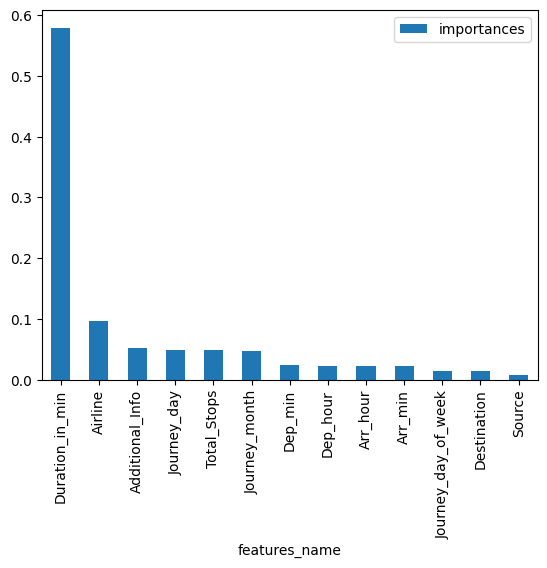

,features_name,importances
11,Duration_in_min,0.579414
0,Airline,0.096092
4,Additional_Info,0.051769
5,Journey_day,0.048668
3,Total_Stops,0.048198
6,Journey_month,0.047740
8,Dep_min,0.023519
7,Dep_hour,0.022903
9,Arr_hour,0.022602
10,Arr_min,0.022052


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt


dataframe.plot.bar(x='features_name', y='importances') 
plt.show()



dataframe.head(10)




In [36]:
corr = df.corr()
corealtion = corr['Price']

corealtion.sort_values(ascending = False)


Price                  1.000000
Total_Stops            0.689791
Duration_in_min        0.609741
Source                 0.121346
Arr_hour               0.056787
Journey_month          0.035329
Journey_day_of_week    0.031433
Dep_hour               0.010217
Airline               -0.055689
Dep_min               -0.059816
Journey_day           -0.076429
Additional_Info       -0.089644
Arr_min               -0.116119
Destination           -0.257625
Name: Price, dtype: float64

In [37]:
dataframe['features_name'].tolist()

['Duration_in_min',
 'Airline',
 'Additional_Info',
 'Journey_day',
 'Total_Stops',
 'Journey_month',
 'Dep_min',
 'Dep_hour',
 'Arr_hour',
 'Arr_min',
 'Journey_day_of_week',
 'Destination',
 'Source']

In [38]:
top_features = ['Duration_in_min',
 'Airline',
 'Additional_Info',
 'Journey_day',
 'Total_Stops',
 'Journey_month',
 'Dep_hour',
 'Arr_hour',
 'Dep_min',
 'Arr_min',
 'Destination',
 'Journey_day_of_week',
 'Source']


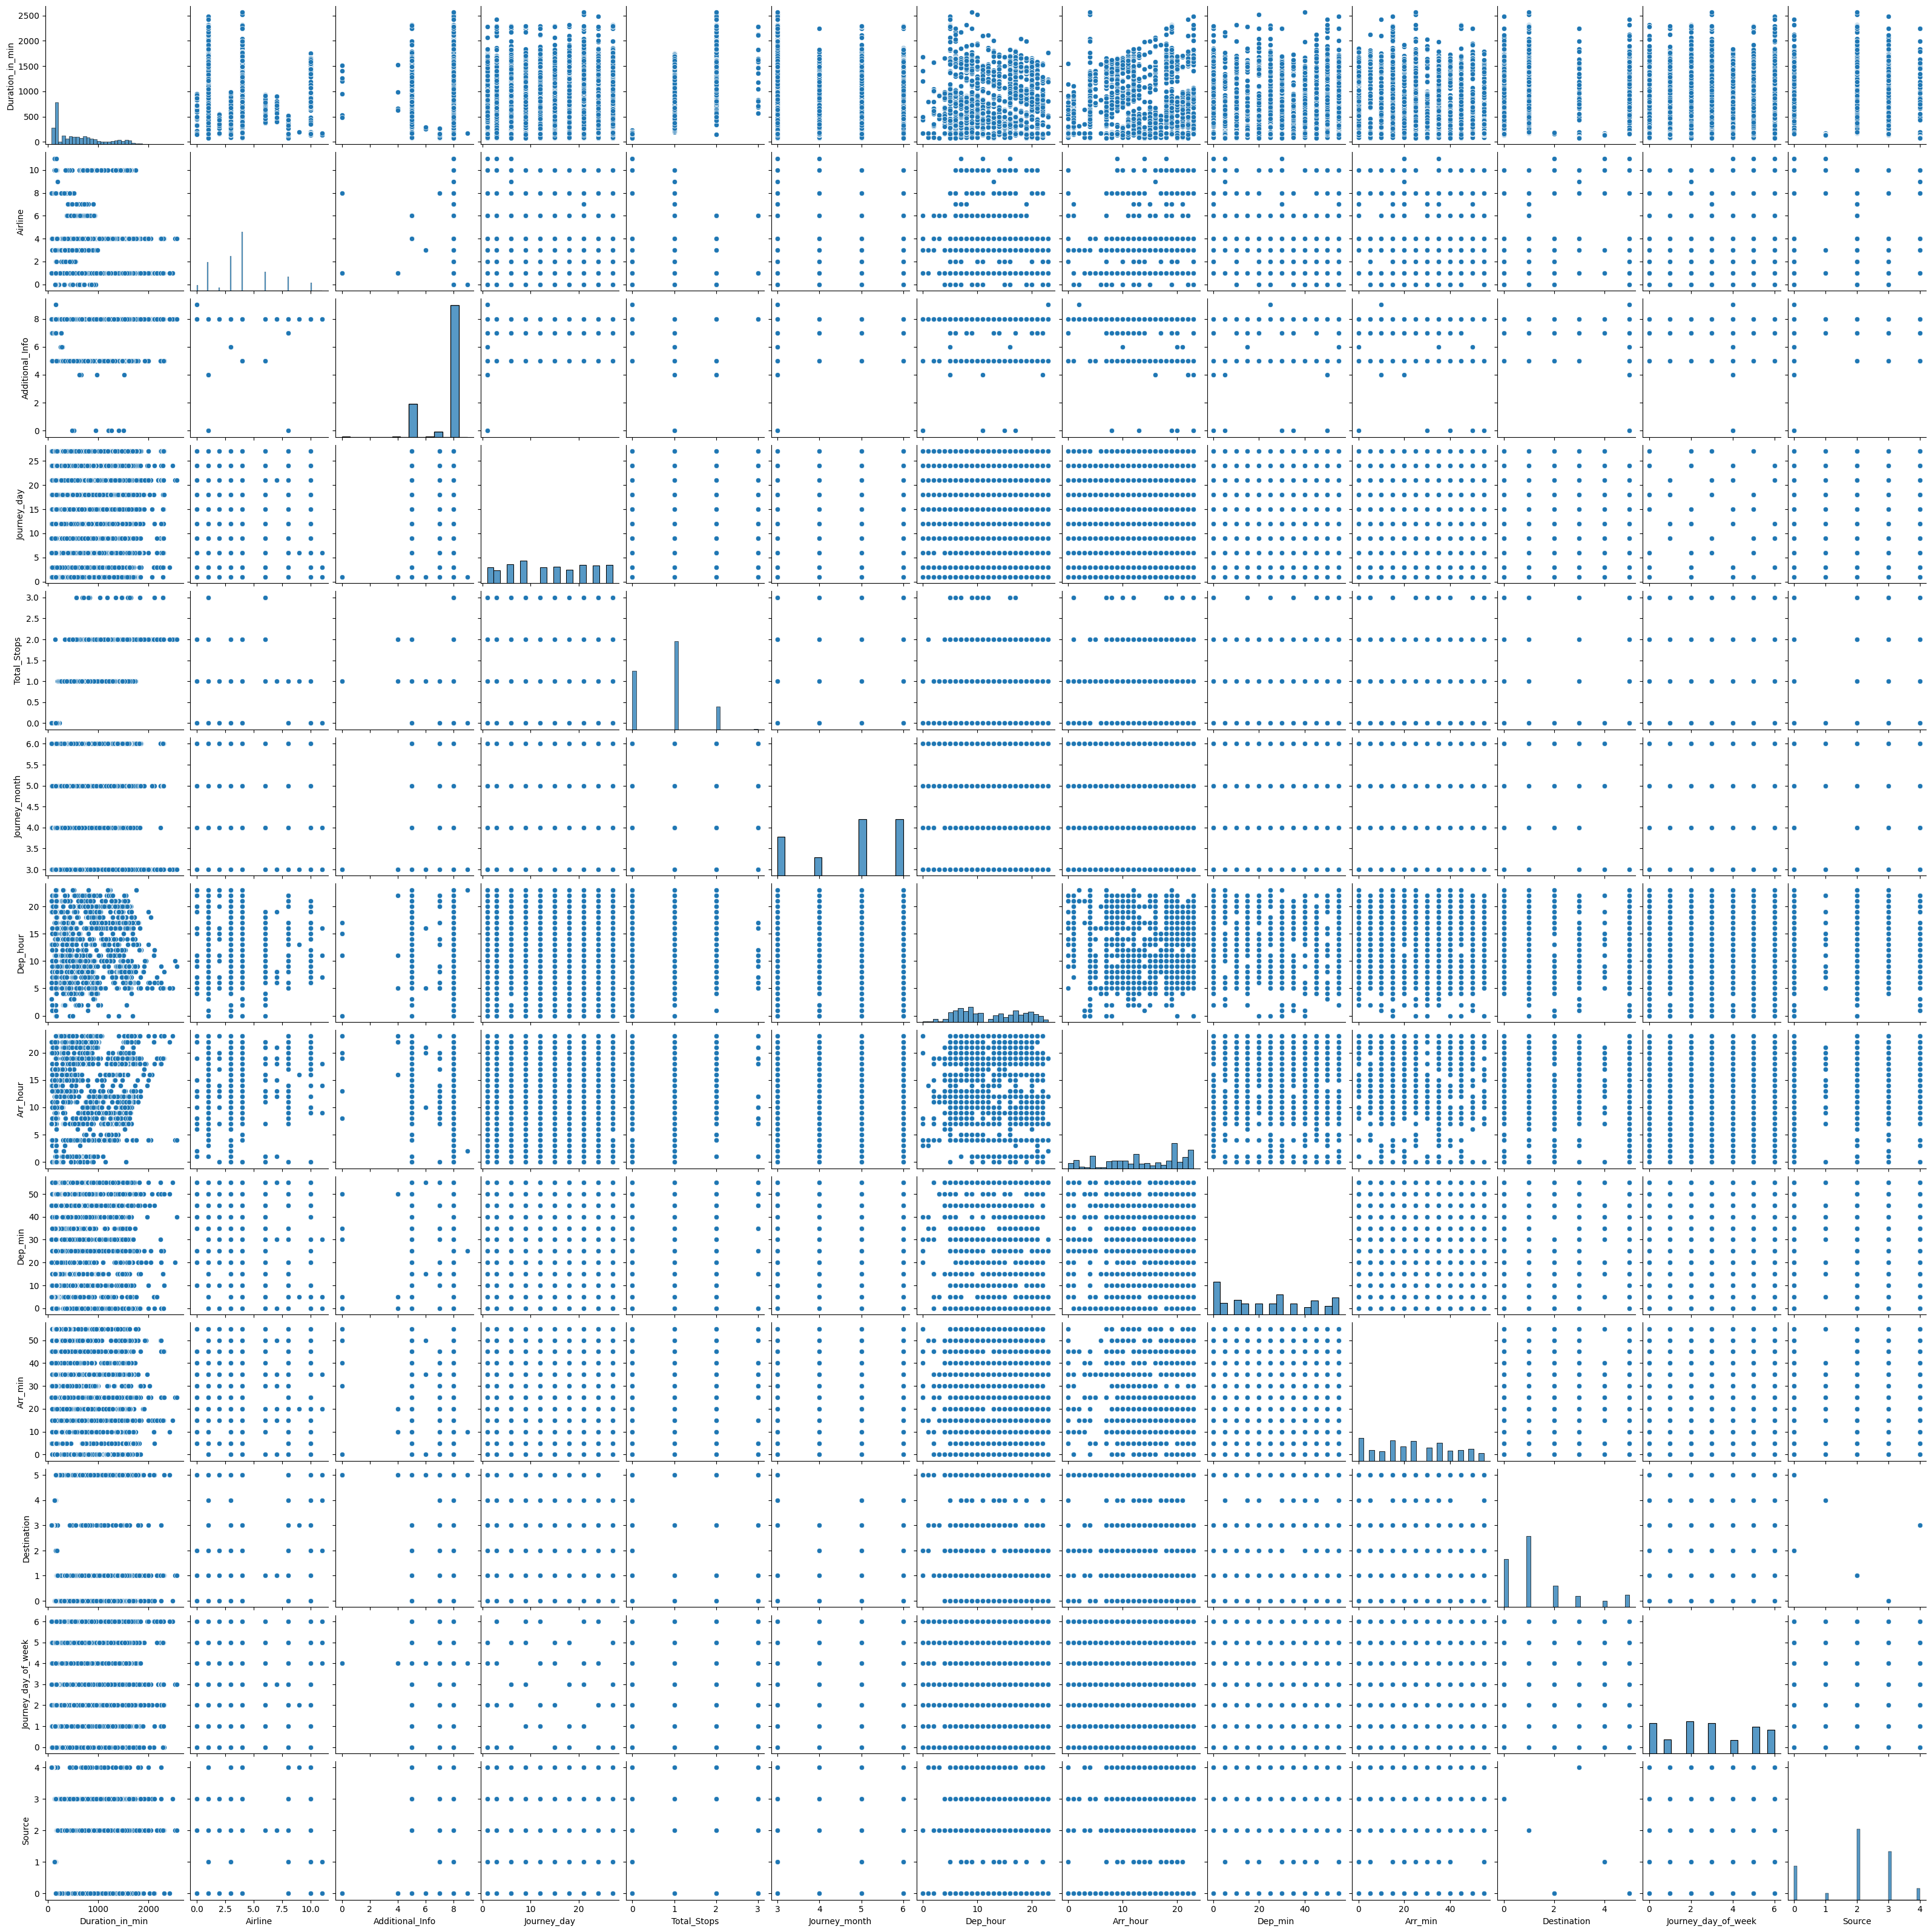

In [39]:
sns.pairplot(df[top_features])
plt.show()

In [40]:
X = df[top_features]  
y = df['Price']        


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {
    "LinearRegression":LinearRegression(),
    "RandomForestRegressor":RandomForestRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor()
}

for name , model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test,y_pred)
    cross  = cross_val_score(model,X,y ,scoring = 'r2' , cv=5)
    print(f"{name}r2 score: {r2:.3f}")
    print(cross)
    print("---"*5)


LinearRegressionr2 score: 0.518
[0.51615078 0.53104708 0.53795963 0.49164958 0.5270217 ]
---------------
RandomForestRegressorr2 score: 0.929
[0.93114118 0.9336538  0.92443497 0.91986689 0.92625842]
---------------
DecisionTreeRegressorr2 score: 0.882
[0.88746016 0.8887165  0.87328671 0.88248523 0.87966377]
---------------
GradientBoostingRegressorr2 score: 0.840
[0.83483007 0.83791485 0.83589016 0.81662493 0.8427159 ]
---------------


In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,root_mean_squared_error

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse  = root_mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("root_mean_squared_error",rmse)


Mean Squared Error: 962572.0396745563
root_mean_squared_error 981.1075576482715


In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

model = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("R2 scores for each fold:", scores)
print("Average R2 score:", np.mean(scores))


R2 scores for each fold: [0.92958899 0.93254815 0.92632925 0.91956306 0.92656892]
Average R2 score: 0.9269196729154778


In [45]:
from sklearn.metrics import r2_score
print("R2 Score:", r2_score(y_test, y_pred))


R2 Score: 0.9288920160366669


In [46]:
import joblib
joblib.dump(model, "Flight_price_model.pkl")


['flight_price_model.pkl']